/var/folders/z6/9bw2tmzj5r1dljwp0czbkc4r0000gn/T/ipykernel_2610/2893459188.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(n=min(50, len(x)), random_state=42))


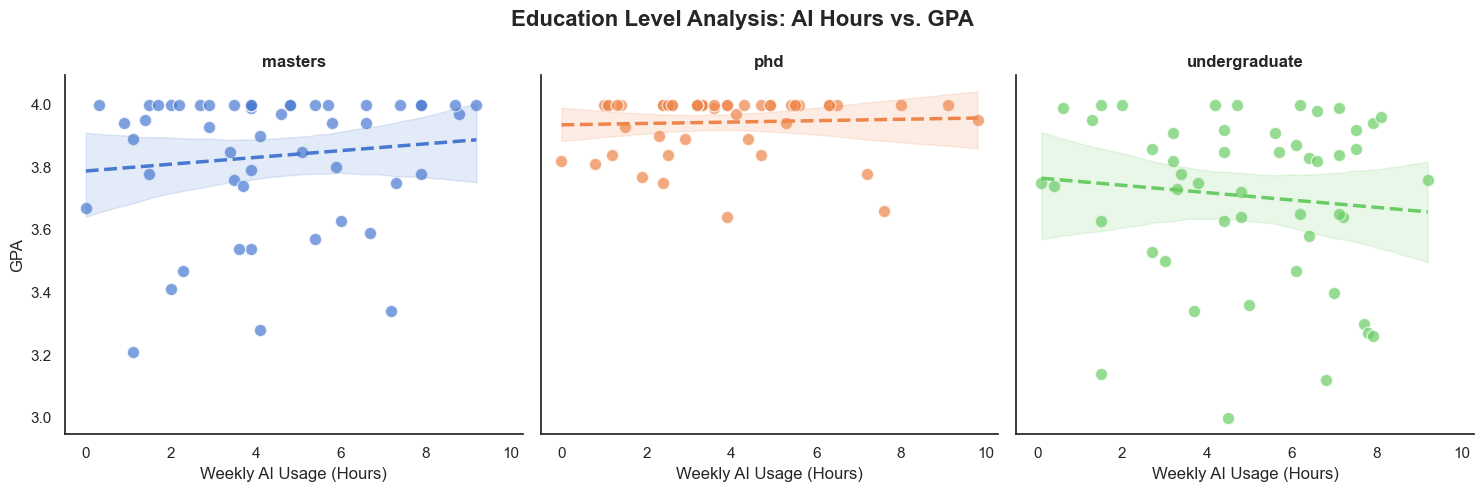

In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Cleaned_ai_usage_112.csv", sep=";")

# To ensure balance among different education levels, 50 people were randomly selected from each education level
df_balanced = (df.groupby('study_level', group_keys=False)
                 .apply(lambda x: x.sample(n=min(50, len(x)), random_state=42))
                 .reset_index(drop=True))

levels = sorted(df_balanced["study_level"].dropna().unique())

# Visual style( use clean background and colors)
sns.set_theme(style="white")
palette = sns.color_palette("muted", len(levels))
color_dict = dict(zip(levels, palette))

# Create a 3-panel grid for each study level
g = sns.FacetGrid(df_balanced, col="study_level", col_order=levels, height=5, aspect=1)

# Match color
def draw_gestalt_plot(data, **kwargs):
    level = data["study_level"].iloc[0]
    col = color_dict[level]
    # # Draw Regression: Dashed line represents the model (Gestalt Continuity)
    sns.regplot(
        data=data, x="ai_hours_week", y="gpa",
        scatter_kws={'s': 80, 'alpha': 0.7, 'edgecolor': 'w', 'color': col},
        line_kws={'color': col, 'lw': 2.5, 'ls': '--'},
        ax=plt.gca()
    )

    for artist in plt.gca().collections:
        if isinstance(artist, PolyCollection):
            artist.set_color(col)
            artist.set_alpha(0.15)

g.map_dataframe(draw_gestalt_plot)
# Labels and titles
g.set_axis_labels("Weekly AI Usage (Hours)", "GPA")
g.set_titles("{col_name}", fontweight='bold', fontsize=13)
sns.despine() # # Remove unnecessary borders (Data-Ink ratio)

# Add title
g.fig.suptitle("Education Level Analysis: AI Hours vs. GPA", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()